start: 2020/05/04 19:07:49
平均: -0.000947


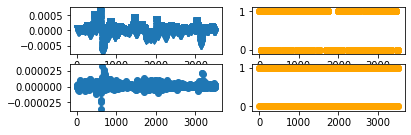

end: 2020/05/04 19:08:21


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from mylib import bitcoin

def plot(b):
    x = b.data_test[-3500:]
    #x = list(range(len(b.data_test[-3500:])))
    y_result = list(b.label_test[-3500:])
    y_predict = list(b.model.predict(x))
    y_result_trend = [i > 0 for i in y_result]
    y_predict_trend = [i > 0 for i in y_predict]

    fig = plt.figure()
    ax1 = fig.add_subplot(4, 2, 1)
    ax2 = fig.add_subplot(4, 2, 3)
    ax3 = fig.add_subplot(4, 2, 2)
    ax4 = fig.add_subplot(4, 2, 4)
    ax1.plot(list(range(len(x))), y_result, marker="v")
    ax2.plot(list(range(len(x))), y_predict, marker="o")
    ax3.scatter(list(range(len(x))), y_result_trend, marker="o", color='orange')
    ax4.scatter(list(range(len(x))), y_predict_trend, marker="o", color='orange')
    plt.show()

def main():
    print('start: ' + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))


    csv = pd.read_csv("datasets/train_v3.csv")
    b = bitcoin.BitcoinRegression()
    b.set_dataset(csv)
    print("平均: %f" % (b.calc_avg_pred()))
    b.set_train_test_dataset(0.8, 0.2)
    b.train()
    plot(b)
    b.save_model('models/model_v3.pickle')
    

    print('end: ' + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))

if __name__ == "__main__":
    main()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

x = list(range(len(b.data_test[-3500:])))
y_result = list(b.label_test[-3500:])
y_predict = list(b.model.predict(x))
y_trend = [i > 0 for i in y_result]

#plt.plot(list(range(len(x))), y, marker="o")
#plt.plot(list(range(len(x))), y_pred, marker="v")
#plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
ax1.plot(x, y_result, marker="v")
ax2.plot(x, y_predict, marker="o")
ax3.scatter(x, y_trend, marker="o", color='orange')
plt.show()